# Exercício 10 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation, graph_fittedData
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9533913135528564, 2.82311184410632e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/TenthMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0  2.933168  3.475457 -1.496359
1  6.332282  3.818907 -8.485410
2  3.638065  2.952795 -6.631056
3  2.798194  3.705128 -7.538564
4  2.430481  3.217096 -7.591791


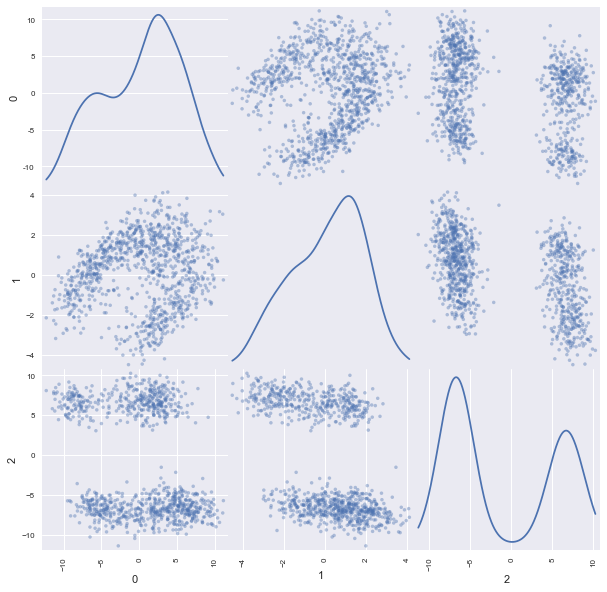

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.2482,0.971,3.0815e-13
1,0,0.1387,0.9801,1.9316e-10
2,0.1774,2.1372,0.7962,1.3018e-33


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, beta = 0.998, runs = 1)

Execution time: 0.09301018714904785 seconds


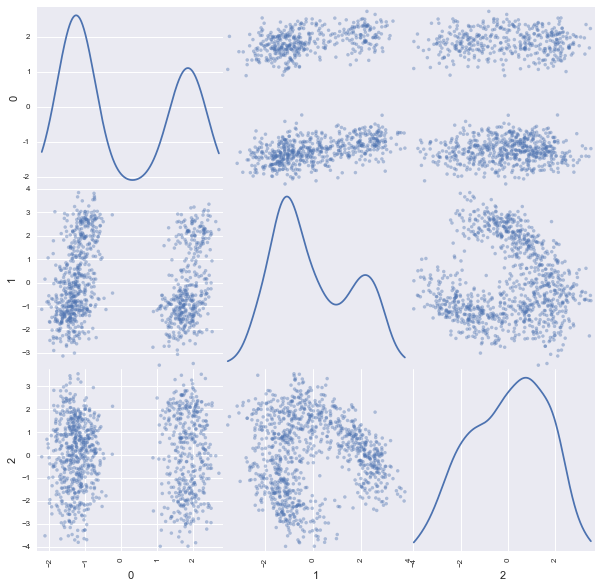

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1574,1.7537,0.8091,9.1618e-33
1,0,0.333,0.9442,5.819e-19
2,0,0.2447,0.9811,4.2832e-10


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


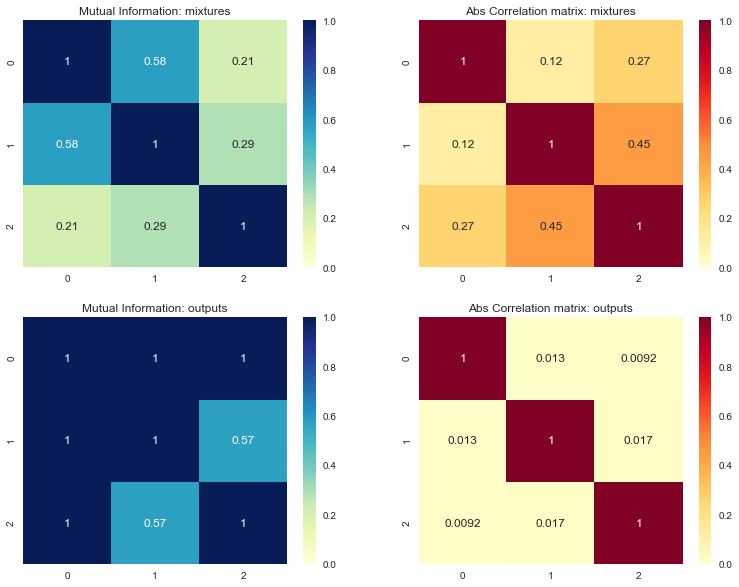

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-5, decayRate = 1e-5, runs  = 1) 

Execution time: 0.11501288414001465 seconds


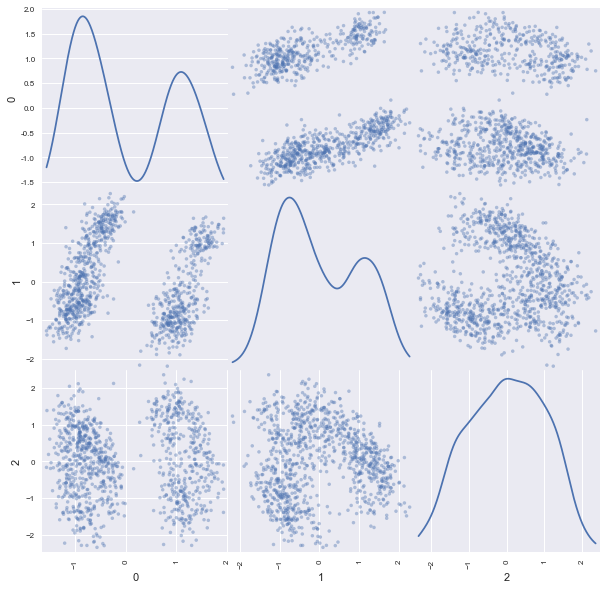

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,1.0141,0.8811,5.6157e-27
1,0,0.3774,0.95,6.4724e-18
2,0,0.2958,0.9851,1.4649e-08


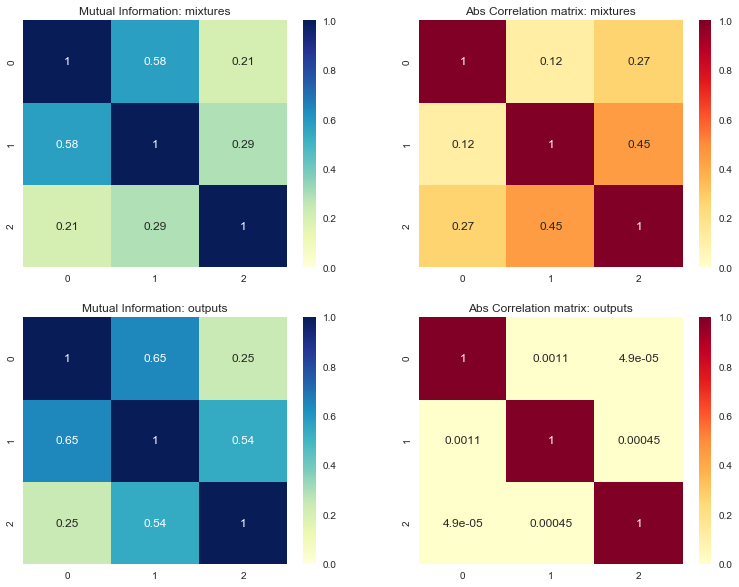

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-6, runs = 1)

Execution time: 0.08701038360595703 seconds


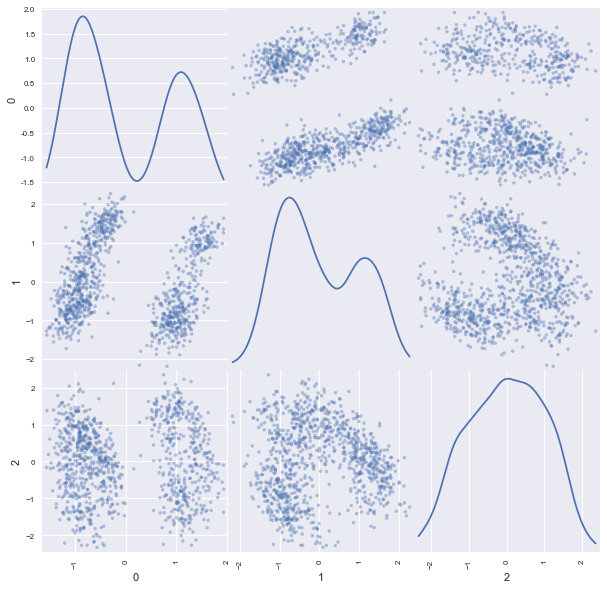

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.8452,0.8815,6.1006e-27
1,0,0.3386,0.9499,6.2123e-18
2,0,0.2866,0.9851,1.4512e-08


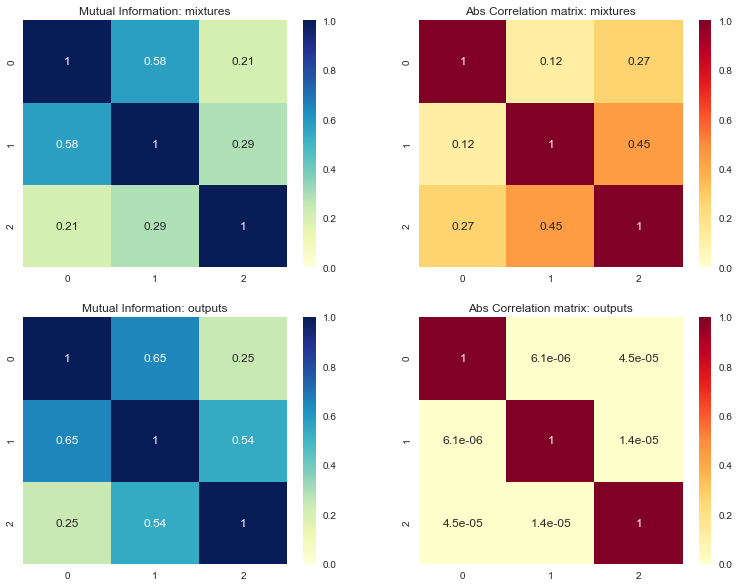

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

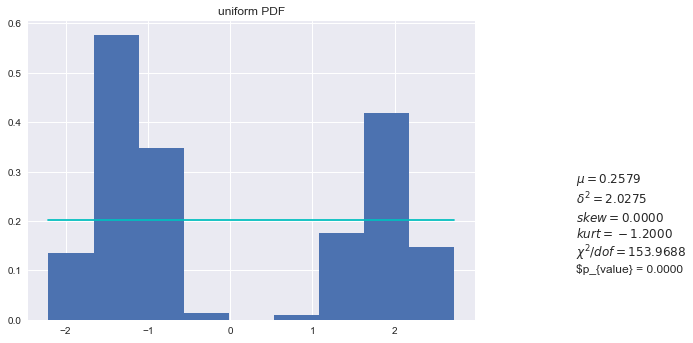

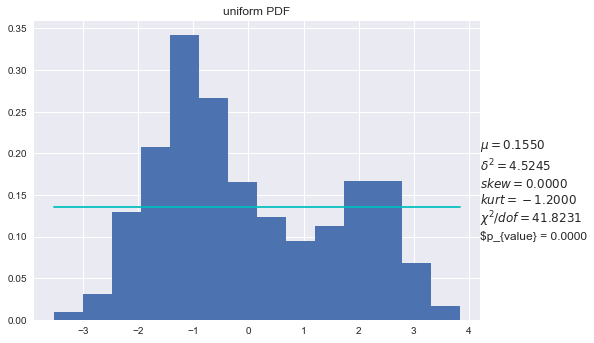

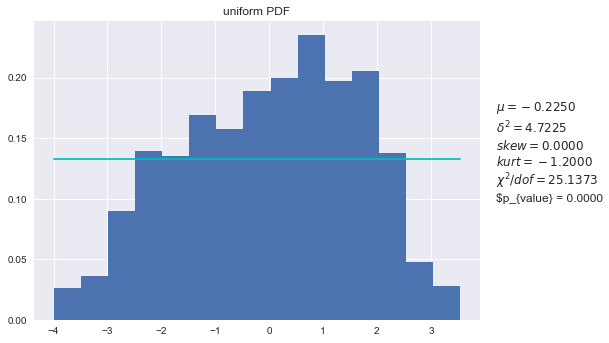

In [15]:
for i, y in enumerate(yNPCA):
    graph_fittedData(y)

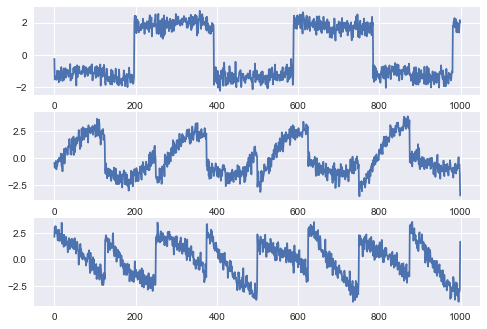

In [25]:
fig, axs = plt.subplots(3,1)

axs[0].plot(yNPCA[0])
axs[1].plot(yNPCA[1])
axs[2].plot(yNPCA[2])
plt.show()

## Chichocki-Unbehauen Algorithm Feedback network

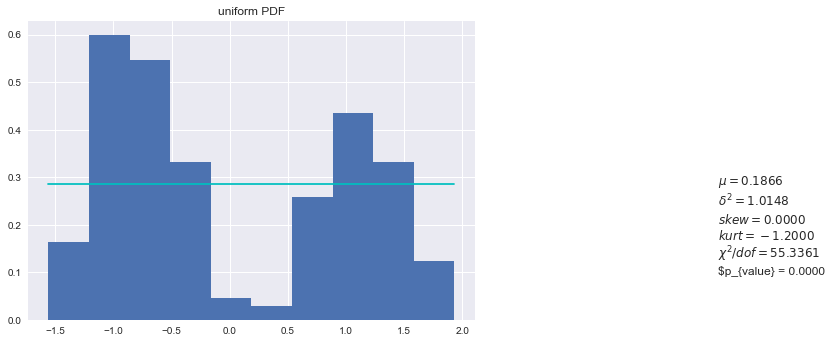

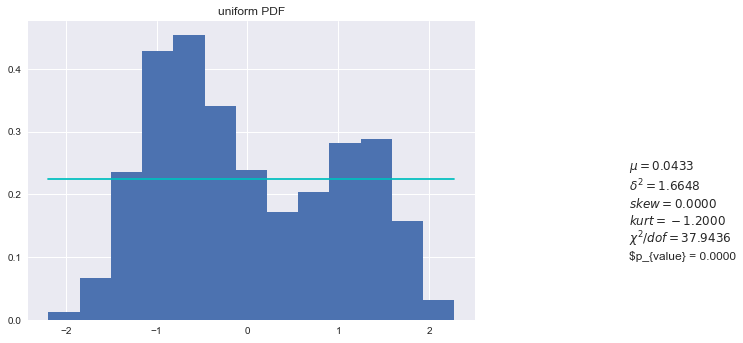

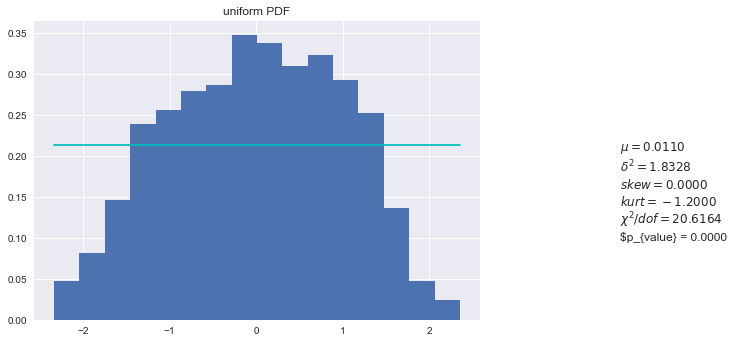

In [16]:
for i, y in enumerate(yFeedback):
    graph_fittedData(y)

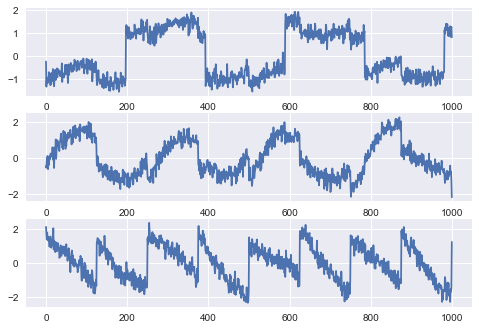

In [26]:
fig, axs = plt.subplots(3,1)

axs[0].plot(yFeedback[0])
axs[1].plot(yFeedback[1])
axs[2].plot(yFeedback[2])
plt.show()

## Chichocki-Unbehauen Algorithm Feedforward network

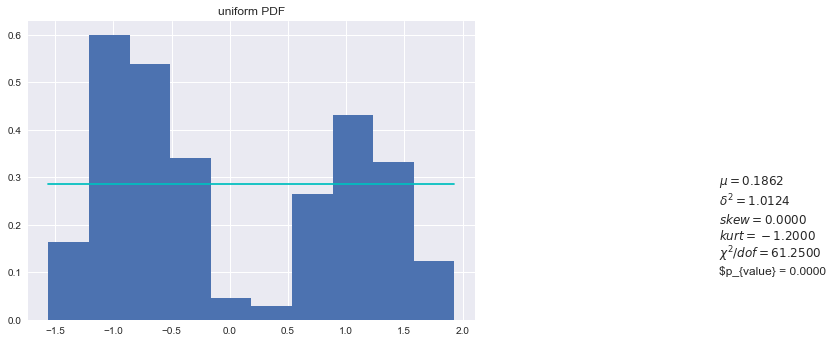

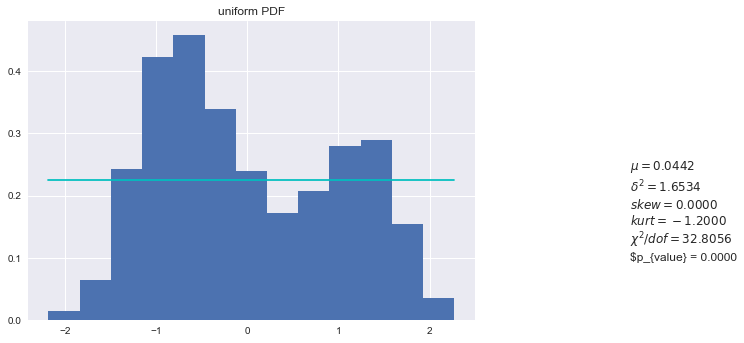

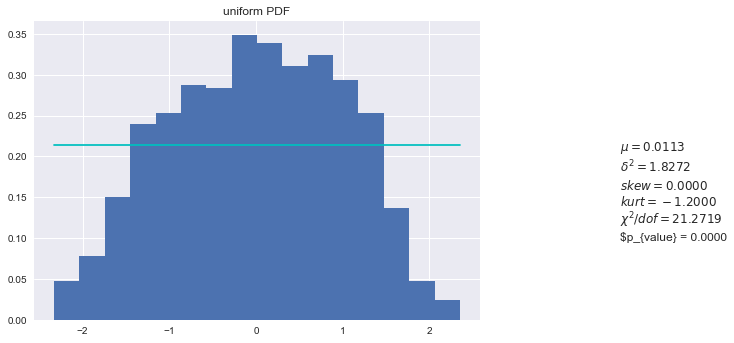

In [17]:
for i, y in enumerate(yFeedforward):
    graph_fittedData(y)

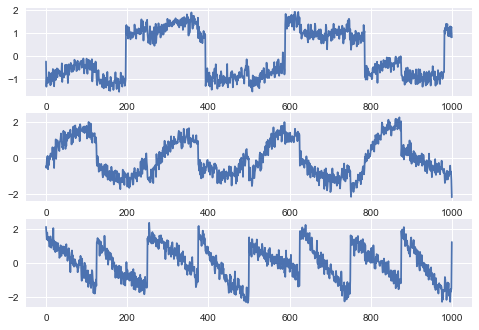

In [27]:
fig, axs = plt.subplots(3,1)

axs[0].plot(yFeedforward[0])
axs[1].plot(yFeedforward[1])
axs[2].plot(yFeedforward[2])
plt.show()

# Fontes conhecidas

In [18]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/TenthSource1000Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(3, 1000)


,0,1,2
0,2.933168,3.475457,-1.496359
1,6.332282,3.818907,-8.485410
2,3.638065,2.952795,-6.631056
3,2.798194,3.705128,-7.538564
4,2.430481,3.217096,-7.591791


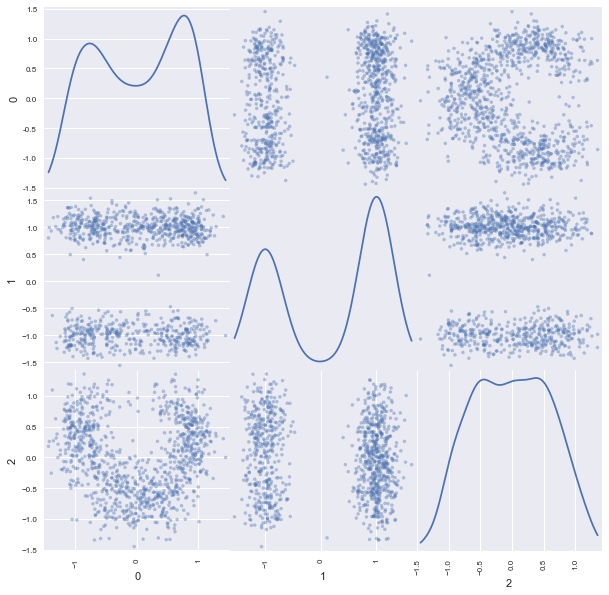

In [19]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(3, 1000) (3, 1000)
[[ 3.09278191  0.12041039  0.0859216 ]
 [ 0.13453458  0.77456277  0.78079495]
 [ 4.98920898  0.07926443  0.01919325]]


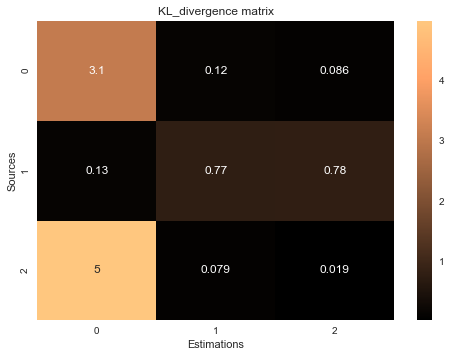

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


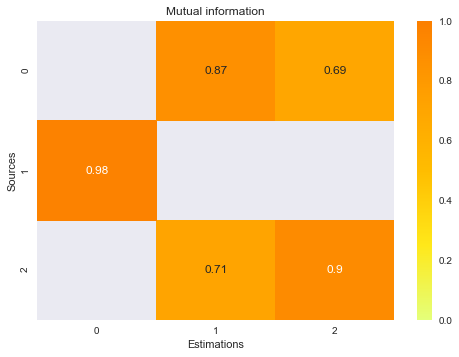

In [20]:
from evaluation   import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(3, 1000) (3, 1000)
[[ 0.25807223  0.0991018   0.09634596]
 [ 0.27658051  0.72249688  0.81774174]
 [ 0.55707605  0.05466432  0.02004429]]


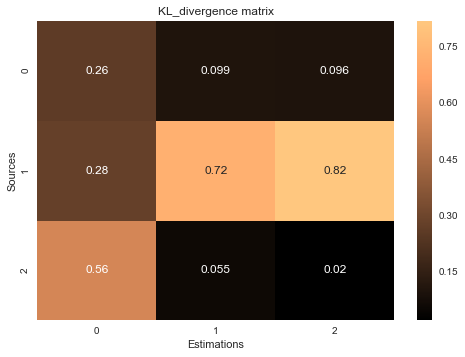

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


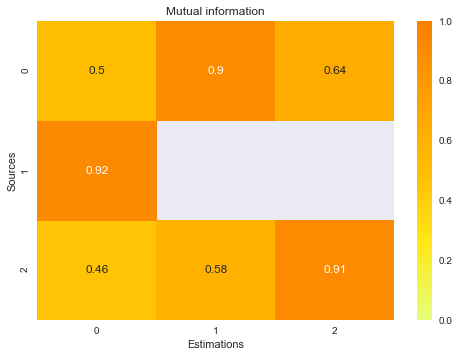

In [21]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(3, 1000) (3, 1000)
[[ 0.25716345  0.09740079  0.09902359]
 [ 0.27472977  0.72402171  0.82124163]
 [ 0.55336281  0.05234794  0.01979122]]


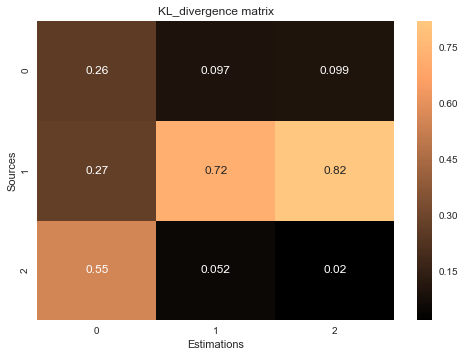

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


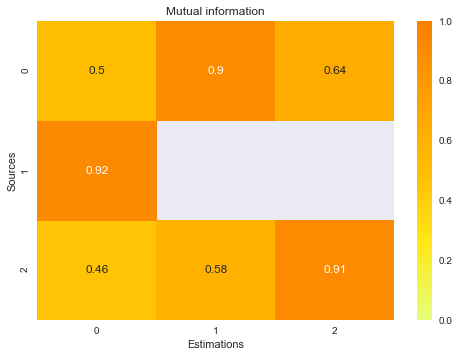

In [22]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)